In [1]:
#workdir = '/SNS/users/lj7/simulations/ARCS/resolution-fit-covmat/debug-Ricky/1-test'
workdir = '/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/notebooks/1-test'
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/notebooks/1-test


# Tools

In [2]:
import mcvine.cli
from mcvine_workflow.singlextal.resolution import use_covmat, use_res_comps
import numpy as np
import histogram as H, histogram.hdf as hh

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

# Sample

In [4]:
%%file Si.yml
name: Si
chemical_formula: Si2
lattice: 
 constants: 5.490700041, 5.490700041, 5.490700041, 90, 90, 90
 basis_vectors:
  - 5.490700041, 0, 0
  - 0, 5.490700041, 0
  - 0, 0, 5.490700041
 primitive_basis_vectors:
  - 0.0, 2.71526503565, 2.71526503565
  - 2.71526503565, 0.0, 2.71526503565
  - 2.71526503565, 2.71526503565, 0.0
excitations:
 - type: DGSresolution
orientation:
 u: -1, 1, -1
 v: 2, 1, -1
shape: cylinder radius="1*mm" height="2*inch"
temperature: 100*K

Overwriting Si.yml


In [5]:
sampleyml = "Si.yml"

# Instrument

In [6]:
instrument = use_covmat.instrument(
    name = 'ARCS',
    detsys_radius = "3.*meter",
    L_m2s = "13.6*meter",
    L_m2fc = "11.61*meter",
    offset_sample2beam = "-0.15*meter" # offset from sample to saved beam
    )
pixel = use_covmat.pixel(
    radius = "0.5*inch",
    height = "meter/128",
    pressure = "10*atm",
    )

# Experiment

In [7]:
#Ei = 100
Ei = 60
class dynamics:
    #hkl0 = [-16/3.,-8/3.,8/3.]
    hkl0 = [0.0, 0.0, 0.0]
    #hkl_dir = np.array([-1.,1.,-1.])/3
    hkl_dir = np.array([1,0,0])
    #E = 40.
    E = 30.0
    #dq = 0
    dq = -3.17390681006
class scan:
    #psimin, psimax, dpsi = -5, 90., 0.5
    #psimin, psimax, dpsi = 45., 47., 0.2
    min, max, step = -5., 90., 0.5

# Use Cov Mat

/SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/workflow/mcvine_workflow/singlextal/solve_psi.py:55: UserWarning: Traceback (most recent call last):
  File "/SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/workflow/mcvine_workflow/singlextal/solve_psi.py", line 52, in solve
    results.append(solver(res, min, max))
  File "/SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/scipy/optimize/zeros.py", line 442, in brentq
    r = _zeros._brentq(f,a,b,xtol,rtol,maxiter,args,full_output,disp)
ValueError: f(a) and f(b) must have different signs

  warnings.warn(tb.format_exc())


psi=9.79767247399, Q=[  2.57099503e+00  -2.56543131e+00  -2.84820759e-16]
hkl2Q=array([[ -8.10041120e-01,   8.08288163e-01,   8.97382235e-17],
       [  5.71546041e-01,   5.72785569e-01,  -8.09165116e-01],
       [ -5.71546041e-01,  -5.72785569e-01,  -8.09165116e-01]])
(Q = hkl dot hkl2Q)
3.63200402251
5.38106180748
[  2.81006678e+00   2.56543131e+00   2.84820759e-16]
ti= 3426.76604318
tf= 1252.24263911
R= 3.0
Q= [  2.57099503e+00  -2.56543131e+00  -2.84820759e-16]
eeta= -0.784314974421


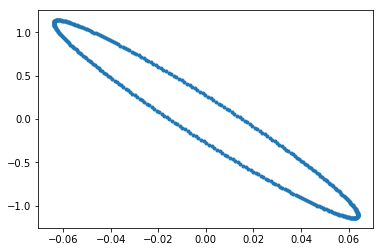

In [8]:
tofwidths = use_covmat.tofwidths(P=10,M=8)
beamdivs = use_covmat.beamdivs(theta = 0.01, phi = 0.01)
samplethickness = 0.0015
u, mR, lambdas = use_covmat.compute(
    sampleyml, Ei, dynamics, scan,
    instrument, pixel,
    tofwidths, beamdivs, samplethickness,
    plot=True)

In [9]:
print mR.shape
print mR
print lambdas

(2, 2)
[[ 0.99852254 -0.05433901]
 [ 0.05433901  0.99852254]]
[  5.91119629e+03   1.06244277e+00]


# Use Res Comps

In [10]:
print dynamics.hkl0, dynamics.hkl_dir, dynamics.dq

[0.0, 0.0, 0.0] [1 0 0] -3.17390681006


In [11]:
hkl = dynamics.hkl0 + dynamics.hkl_dir*dynamics.dq

In [12]:
#beam = "/SNS/users/lj7/simulations/ARCS/beam/100meV-n1e10"
beam = "/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/mcvine_resolution/beams/beam_60_1e9"
#psi_axis = scan.psimin, scan.psimax, scan.dpsi
# psi_axis = scan.min, scan.max, scan.step
use_res_comps.setup(
    'out.res_comps_tmp', sampleyml, beam, dynamics.E, hkl, dynamics.hkl_dir,
    scan, instrument, pixel)

Ei=60.5749708602, t0=25.8434782478
Computed:
* psi=9.52515887496 degree
* Q=[ 2.55876414 -2.57763056  0.        ]
* hkl2Qmat=[[-0.80618754  0.81213177  0.        ]
 [ 0.57426388  0.57006068 -0.80916512]
 [-0.57426388 -0.57006068 -0.80916512]]
* ki=5.40678328097
* vectors ki=[ 5.40678328  0.          0.        ], kf=[ 2.84801914  2.57763056  0.        ]
These two numbers should be very close:
  30.0
  30.0
  Ei=60.5749708602, Ef=30.5749708602
* Ef=30.5749708602
* pixel positon=[ 2.22427652  2.01310555  0.        ]
* pixel_position=[ 2.22427652  2.01310555  0.        ]
t_m2s=0.00402087455134, t_s2p=0.00124041237111, t_m2p=0.00526128692245


In [13]:
ls out.res_comps_tmp/

dEs.npy  dhkls.npy  dxs.npy  log.run  probs.npy  res.h5  run.py  sample/


In [14]:
%%file out.res_comps_tmp/run.py
#!/usr/bin/env python
import mcvine.cli
from numpy import array
from mcvine_workflow.singlextal.resolution import use_res_comps as urc
beam_neutrons_path = '/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/mcvine_resolution/beams/beam_60/out/neutrons'
instrument = urc.instrument('ARCS', '3.*meter', '13.6*meter', '-0.15*meter')
samplexmlpath = '/SNS/users/lj7/simulations/ARCS/resolution-fit-covmat/debug-Ricky/1-test/out.res_comps_tmp/sample/sampleassembly.xml'
psi = -0.08725694187870671
hkl2Q = array([[-0.57674248,  0.98836455,  0.        ],
       [ 0.69887928,  0.40781852, -0.80916512],
       [-0.69887928, -0.40781852, -0.80916512]])
pp = array([ 2.44150988,  1.74328124,  0.        ])
pixel = urc.pixel('0.5*inch', 'meter/128', '10*atm', position=(pp[1], pp[2], pp[0]))
t_m2p = 0.0050371160063350257
Q = array([ 1.59000154, -2.7247883 ,  0.        ])
E = 15.0
hkl_projection = array([1, 0, 0])
urc.run(
    beam_neutrons_path, instrument, samplexmlpath, psi, hkl2Q, pixel, t_m2p,
    Q, E, hkl_projection, Nbuffer=100000)

Overwriting out.res_comps_tmp/run.py


In [15]:
%%time
%cd {workdir}/out.res_comps_tmp/
!python run.py >log.run
%cd {workdir}

/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/notebooks/1-test/out.res_comps_tmp
Traceback (most recent call last):
  File "run.py", line 20, in <module>
    Q, E, hkl_projection, Nbuffer=100000)
  File "/SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/workflow/mcvine_workflow/singlextal/resolution/use_res_comps.py", line 285, in run
    dxs_all *= -1
TypeError: unsupported operand type(s) for *=: 'NoneType' and 'int'
/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/notebooks/1-test
CPU times: user 19 ms, sys: 7.65 ms, total: 26.6 ms
Wall time: 693 ms


In [16]:
ls out.res_comps_tmp/

dEs.npy  dhkls.npy  dxs.npy  log.run  probs.npy  res.h5  run.py  sample/


In [17]:
res = hh.load('out.res_comps_tmp/res.h5')

/SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


In [18]:
q = res.x
E = res.E
dE = E[1]-E[0]
dq = q[1]-q[0]
Eg, qg = np.mgrid[slice(E[0], E[-1]+dE/2, E[1]-E[0]), slice(q[0], q[-1]+dq/2, q[1]-q[0])]

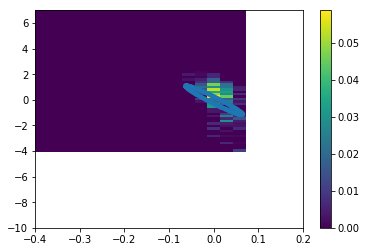

In [19]:
# plt.figure(figsize=(4,6))
plt.pcolormesh(qg, Eg, res.I.T, cmap='viridis')
# plt.clim(0, 0.001)
plt.xlim(-0.4,0.2)
plt.ylim(-10,7)
plt.colorbar()
plt.plot(u[:, 0], u[:, 1], '.')

(-10, 7)

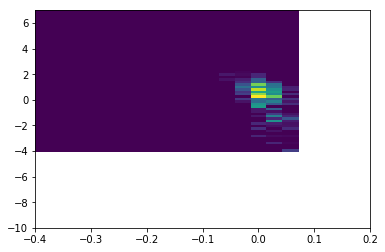

In [20]:
# added by me: plot just the mcvine result

plt.figure()
plt.pcolormesh(qg, Eg, res.I.T)
plt.xlim(-0.4,0.2)
plt.ylim(-10,7)

In [21]:
# compute the variance in q and E
#print res.I.T.shape
#print qg.shape
#print Eg.shape

# we must debug:  there is some huge intensity value which is throwing everything off
maxelement = np.max(res.I.T)
print maxelement
maxindex1, maxindex2 = np.where(res.I.T == maxelement)
print maxindex1, maxindex2
print maxindex1.shape
print maxindex2.shape
m11 = maxindex1[0]
m12 = maxindex2[0]
print m11, m12
withoutmax = np.copy(res.I.T)
withoutmax[m11][m12] = 0.0
maxelement2 = np.max(withoutmax)
m21, m22 = np.where(withoutmax == maxelement2)
print maxelement2
print m21, m22

print "withoutmax[m11][m12] = " + str(withoutmax[m11][m12])

# remove erroneous max element if it exists
if np.fabs(maxelement - maxelement2) > 0.1*maxelement2:
    I = withoutmax
else:
    I = res.I.T
    

weighted_qs = np.multiply(qg, I)
weighted_Es = np.multiply(Eg, I)
print weighted_qs.shape

sum_weights = np.sum(I)
print sum_weights
q_mean = np.sum(weighted_qs) / sum_weights
print q_mean
E_mean = np.sum(weighted_Es) / sum_weights
print E_mean

print q.shape, E.shape

q_avg = np.average(qg, axis=None, weights=I)
#print res.I.T

topten = np.zeros(10)
topten = topten.tolist()
indices = np.zeros((10,2))
for i in range(100):
    for j in range(100):
        toptenmin = min(topten)
        index = topten.index(toptenmin)
        if res.I.T[i][j] > toptenmin:
            topten[index] = res.I.T[i][j]
            indices[index][0] = i
            indices[index][1] = j

print topten
print indices


4977418157.9
[99] [0]
(1,)
(1,)
99 0
0.0587190990355
[22] [96]
withoutmax[m11][m12] = 0.0
(100, 100)
1.02408665559
-0.000332899050269
0.0423884607848
(100,) (100,)
[0.034761554786473109, 0.058719099035507746, 0.045001127129696977, 0.053157566884861646, 0.03226236679757364, 0.032386030392894685, 0.030096975948945875, 0.048693492570903156, 4977418157.9005308, 0.046531781595261792]
[[ 24.  96.]
 [ 22.  96.]
 [ 22.  97.]
 [ 25.  96.]
 [ 18.  96.]
 [ 24.  97.]
 [ 19.  96.]
 [ 23.  96.]
 [ 99.   0.]
 [ 27.  96.]]


In [24]:
# compute the variance in q and E
#print res.I.T.shape
#print qg.shape
#print Eg.shape

# we must debug:  there is some huge intensity value which is throwing everything off
maxelement = np.max(res.I.T)
#print maxelement
maxindex1, maxindex2 = np.where(res.I.T == maxelement)
#print maxindex1, maxindex2
#print maxindex1.shape
#print maxindex2.shape
m11 = maxindex1[0]
m12 = maxindex2[0]
#print m11, m12
withoutmax = np.copy(res.I.T)
withoutmax[m11][m12] = 0.0
maxelement2 = np.max(withoutmax)
m21, m22 = np.where(withoutmax == maxelement2)
#print maxelement2
#print m21, m22

#print "withoutmax[m11][m12] = " + str(withoutmax[m11][m12])

# remove erroneous max element if it exists
if np.fabs(maxelement - maxelement2) > 0.1*maxelement2:
    I = withoutmax
else:
    I = res.I.T
    

weighted_qs = np.multiply(qg, I)
weighted_Es = np.multiply(Eg, I)
print weighted_qs.shape

sum_weights = np.sum(I)
print sum_weights
q_mean = np.sum(weighted_qs) / sum_weights
print "q_mean = " + str(q_mean)
E_mean = np.sum(weighted_Es) / sum_weights
print "E_mean = " + str(E_mean)

print q.shape, E.shape

q_avg = np.average(qg, axis=None, weights=I)
E_avg = np.average(Eg, axis=None, weights=I)
#print res.I.T
print q_avg, E_avg

q_avg_array = np.zeros(I.shape)
q_avg_array.fill(q_avg)
q_diffs = qg - q_avg_array
q_diffs2 = np.square(q_diffs)
w_q_diffs2 = np.multiply(q_diffs2, I)
wq_diff_sum = np.sum(w_q_diffs2)
Var_q = wq_diff_sum / sum_weights
print Var_q

E_avg_array = np.zeros(I.shape)
E_avg_array.fill(E_avg)
E_diffs = Eg - E_avg_array
E_diffs2 = np.square(E_diffs)
w_E_diffs2 = np.multiply(E_diffs2, I)
wE_diff_sum = np.sum(w_E_diffs2)
Var_E = wE_diff_sum / sum_weights
print Var_E

# Now, compute the covariance of q and E
product_diffs = np.multiply(q_diffs, E_diffs)
w_prod_diffs = np.multiply(product_diffs, I)
sum_w_prod_diffs = np.sum(w_prod_diffs)
Cov_qE = sum_w_prod_diffs / sum_weights
print Cov_qE

(100, 100)
1.02408665559
q_mean = -0.000332899050269
E_mean = 0.0423884607848
(100,) (100,)
-0.000332899050269 0.0423884607848
0.000591450185975
1.31380448826
-0.0141609773444


In [23]:
# added by me: try fitting Gaussian covariance matrix

import scipy.optimize as opt

# define multivariate Gaussian model
# x,y = points to compute value at, x_o,y_o = center point, s2x = x_variance (at x_0,y_o), 
# sxy = x,y_covariance, s2y = y_variance
def _mvGaussian(x, y, x_o, y_o, s2x, sxy, s2y):
    M = np.array([[s2x, sxy], [sxy, s2y]])  # covariance matrix
    detM = s2x*s2y - sxy**2
    
    